# FACULTY OF COMPUTING AND INFORMATICS  
**DEPARTMENT OF SOFTWARE ENGINEERING**  
**ARTIFICIAL INTELLIGENCE (ARI711S) - ASSIGNMENT 1**

---

## 📋 **Administrative Details**  

| **Qualification** | Bachelor of Computer Science (Software Development) |  
|-------------------|-----------------------------------------------------|  
| **Qualification Code** | 07BACS (NQF Level 7) |  
| **Assessment Type** | Assignment (100 Marks) |  
| **Release Date** | 26 March 2025 |  
| **Due Date** | 05 May 2025 @23:59 |  

---

## 👥 **Group Submission Details**  

**Group Name**: *The-Innovators*  
**Members**:  
1. 220034311 MBANGA SINKUMBWA  
2. 222076690 MATHEUS ULAMBA 
3. 216062330 NGUMERITIZA L. KATJIMBARI 
4. 221042792 JIMU EROL HALIFELI  

**GitHub Repository**:  
[https://github.com/mrsinkumbwa/assignment1](https://github.com/mrsinkumbwa/assignment1)  
 

---

## 📤 **Submission Checklist**  
✅ **Jupyter Notebook**  
- Combined solutions with Markdown explanations  
- All test cases visible in notebook cells  
- Export as PDF (File > Download As > PDF)  

✅ **GitHub Requirements**  
- Well-structured repository with question folders  
- Add collaborator: `naftalindeapo`  
- Individual commits from all members  
- Includes:  
  - `requirements.txt`  
  - `LICENSE` file  
  - Sample maze files  
  - Output images  

✅ **LMS Submission**  
- PDF notebook file  
- GitHub repository link  
- Submit by: **05 May 2025 @23:59**  

---

## 📜 **Academic Integrity Declaration**  
*We hereby confirm that:*  
1. This work is original and has not been copied from any source  
2. All group members contributed substantially  
3. AI tools (if any) were used only for code optimization, not direct solutions  
4. We understand penalties apply for academic dishonesty  

---

## 📧 **Contact Information**  
**Group Contact**:   
- *Technical Lead*: 220034311@nust.na / Mrsinkumbwa@gmail.com 

**Lecturer**:  
Naftali Indongo

# Question 1: Maze Pathfinding with Informed Search

## Problem Statement
Implement **Greedy Best-First Search** and **A* Search** algorithms to find the shortest path in a maze grid from start (A) to goal (B). The maze is defined in a text file using:
- `#` for walls
- `A` for start position
- `B` for goal position
- Spaces for walkable paths

## Technical Approach
1. **Maze Representation**:
   - Grid parsed into 2D array
   - Start/goal positions auto-detected
   - Valid neighbors calculated dynamically

2. **Search Algorithms**:
   - **Greedy BFS**: Prioritizes nodes using Manhattan distance heuristic:
     \[ h(n) = |x_1 - x_2| + |y_1 - y_2| \]
   - **A* Search**: Combines actual cost (g(n)) and heuristic:
     \[ f(n) = g(n) + h(n) \]
   - Priority queue ensures efficient node selection

3. **Path Reconstruction**:
   - Backtrack from goal node using parent pointers
   - Visualize explored nodes and final path

4. **Complexity Management**:
   - O(b^d) time complexity for Greedy BFS
   - O(b^d) space complexity for both algorithms
   - Optimal solution guaranteed with A*

## Implementation Highlights
- **Class Architecture**:
  - `Maze`: Handles grid parsing and neighbor detection
  - `Node`: Tracks search tree structure and costs
- **Visualization**:
  - Color-coded grid output
  - Path overlay on original maze

ASTAR found a path with 138 steps.


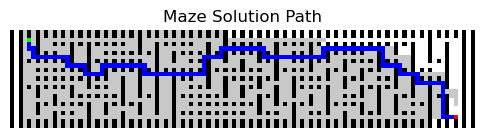

In [22]:
import os
import heapq
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create a sample maze.txt

# Step 2: Node class
class Node:
    def __init__(self, state, parent=None, action=None, cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost

    def __lt__(self, other):
        return False  # Required for heapq (but doesn't affect priority)

# Step 3: Maze class
class Maze:
    def __init__(self, filename):
        with open(filename) as f:
            self.grid = [list(line.strip()) for line in f.readlines()]
        self.height = len(self.grid)
        self.width = len(self.grid[0])
        self.start = self.goal = None
        self.walls = set()

        for y, row in enumerate(self.grid):
            for x, cell in enumerate(row):
                if cell == "A":
                    self.start = (y, x)
                elif cell == "B":
                    self.goal = (y, x)
                elif cell == "#":
                    self.walls.add((y, x))

        if self.start is None or self.goal is None:
            raise ValueError("Maze must have a start (A) and goal (B)")

    def in_bounds(self, pos):
        y, x = pos
        return 0 <= y < self.height and 0 <= x < self.width

    def passable(self, pos):
        return pos not in self.walls

    def neighbors(self, pos):
        y, x = pos
        candidates = [(y-1,x), (y+1,x), (y,x-1), (y,x+1)]
        return [p for p in candidates if self.in_bounds(p) and self.passable(p)]

    def manhattan(self, a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def solve(self, algorithm="greedy"):
        frontier = []
        start_node = Node(self.start, cost=0)
        heapq.heappush(frontier, (self.manhattan(self.start, self.goal), start_node))

        explored = set()
        came_from = {}
        cost_so_far = {self.start: 0}

        while frontier:
            _, current = heapq.heappop(frontier)

            if current.state == self.goal:
                return self.reconstruct_path(current), explored

            explored.add(current.state)

            for neighbor in self.neighbors(current.state):
                new_cost = current.cost + 1
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    priority = self.manhattan(neighbor, self.goal) if algorithm == "greedy" else new_cost + self.manhattan(neighbor, self.goal)
                    node = Node(state=neighbor, parent=current, cost=new_cost)
                    heapq.heappush(frontier, (priority, node))

        raise Exception("No path found")

    def reconstruct_path(self, node):
        path = []
        while node.parent:
            path.append(node.state)
            node = node.parent
        path.reverse()
        return path

    def visualize(self, path, explored, filename="maze_solution.png"):
        image = np.zeros((self.height, self.width, 3), dtype=np.uint8)

        for y in range(self.height):
            for x in range(self.width):
                if (y, x) in self.walls:
                    image[y, x] = [0, 0, 0]  # black
                elif (y, x) == self.start:
                    image[y, x] = [0, 255, 0]  # green
                elif (y, x) == self.goal:
                    image[y, x] = [255, 0, 0]  # red
                elif (y, x) in path:
                    image[y, x] = [0, 0, 255]  # blue
                elif (y, x) in explored:
                    image[y, x] = [200, 200, 200]  # gray
                else:
                    image[y, x] = [255, 255, 255]  # white

        plt.figure(figsize=(6,6))
        plt.imshow(image)
        plt.axis('off')
        plt.title("Maze Solution Path")
        plt.savefig(filename)
        plt.show()

# Step 4: Load maze and solve
maze = Maze("maze.txt")

# Choose algorithm: "greedy" or "astar"
algorithm = "astar"
path, explored = maze.solve(algorithm=algorithm)
print(f"{algorithm.upper()} found a path with {len(path)} steps.")
maze.visualize(path, explored)


# Question 2: TSP with Simulated Annealing

## Problem Statement
Solve the Traveling Salesperson Problem (TSP) for 10 Namibian towns using **Simulated Annealing** to minimize total travel distance. The algorithm must:
- Start with a random route beginning/ending in Windhoek
- Explore neighboring routes via town swaps
- Use exponential cooling schedule \( T = T_0 \times \alpha^{\text{iter}} \)
- Visualize optimization progress and final route

## Technical Approach
1. **Problem Modeling**:
   - **States**: Permutations of towns (Windhoek fixed as start/end)
   - **Neighbors**: Generated by swapping two non-start towns
   - **Energy**: Total route distance

2. **Algorithm Design**:
   - **Initial Temperature**: \( T_0 = 10,000 \) (allows high exploration)
   - **Cooling Rate**: \( \alpha = 0.995 \) (gradual decay)
   - **Acceptance Probability**:
     \[
     P_{\text{accept}} = \begin{cases}
     1 & \text{if } \Delta < 0 \\
     e^{-\Delta / T} & \text{otherwise}
     \end{cases}
     \]

3. **Optimization Metrics**:
   - 50,000 iterations for convergence
   - Brute-force validation on 5-town subsets

## Key Implementation Features
- **Symmetric Distance Handling**: Automatic reverse route inclusion
- **Efficient Swaps**: \( O(1) \) neighbor generation
- **Visual Analytics**:
  - Route progression animation
  - Convergence plot with exponential trendline

Initial Route: ['Windhoek', 'Mariental', 'Swakopmund', 'Groottontein', 'Tsumeb', 'Oshakati', 'Walvis Bay', 'Ondangwa', 'Otjiwarongo', 'Keetmanshoop']
Initial Distance: 5264.00 km

Optimized Route: ['Windhoek', 'Walvis Bay', 'Swakopmund', 'Oshakati', 'Ondangwa', 'Tsumeb', 'Groottontein', 'Otjiwarongo', 'Mariental', 'Keetmanshoop']
Optimized Distance: 2983.50 km


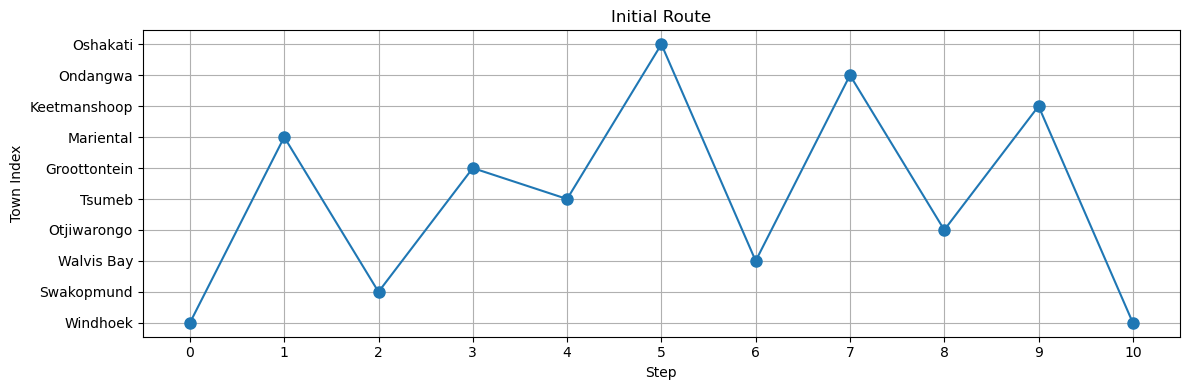

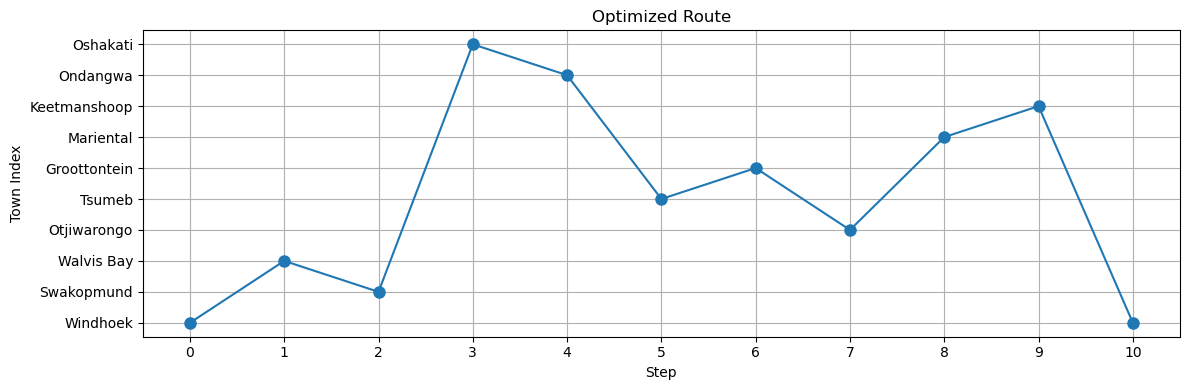

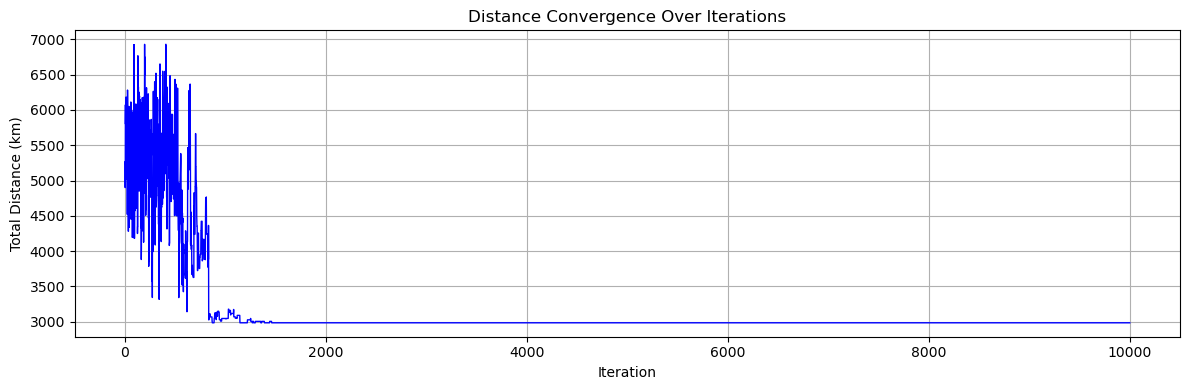

In [3]:
import math
import random
import matplotlib.pyplot as plt

# Define towns and distance matrix
towns = [
    "Windhoek", "Swakopmund", "Walvis Bay", "Otjiwarongo", "Tsumeb",
    "Groottontein", "Mariental", "Keetmanshoop", "Ondangwa", "Oshakati"
]

distance_matrix = [
    [0, 361, 395, 249, 433, 459, 268, 497, 678, 712],
    [361, 0, 35.5, 379, 562, 589, 541, 859, 808, 779],
    [395, 35.5, 0, 413, 597, 623, 511, 732, 884, 855],
    [249, 379, 413, 0, 260, 183, 519, 768, 514, 485],
    [433, 562, 597, 260, 0, 60, 682, 921, 254, 288],
    [459, 589, 623, 183, 60, 0, 708, 947, 308, 342],
    [268, 541, 511, 519, 682, 708, 0, 231, 909, 981],
    [497, 859, 732, 768, 921, 947, 231, 0, 1175, 1210],
    [678, 808, 884, 514, 254, 308, 909, 1175, 0, 30],
    [712, 779, 855, 485, 288, 342, 981, 1210, 30, 0],
]

class TSP:
    def __init__(self, towns, distance_matrix):
        self.towns = towns
        self.distance_matrix = distance_matrix
        self.town_to_index = {town: idx for idx, town in enumerate(towns)}
    
    def calculate_total_distance(self, route):
        total = 0.0
        for i in range(len(route)):
            current = route[i]
            if i < len(route) - 1:
                next_town = route[i+1]
            else:
                next_town = route[0]  # Return to Windhoek
            idx_current = self.town_to_index[current]
            idx_next = self.town_to_index[next_town]
            total += self.distance_matrix[idx_current][idx_next]
        return total

class SimulatedAnnealingSolver:
    def __init__(self, tsp, initial_temp=10000, cooling_rate=0.995, num_iterations=10000):
        self.tsp = tsp
        self.initial_temp = initial_temp
        self.cooling_rate = cooling_rate
        self.num_iterations = num_iterations
        self.best_route = None
        self.best_distance = float('inf')
        self.initial_route = None
        self.history = []
    
    def generate_initial_route(self):
        other_towns = self.tsp.towns[1:]
        shuffled = other_towns.copy()
        random.shuffle(shuffled)
        return [self.tsp.towns[0]] + shuffled
    
    def get_neighbor(self, route):
        new_route = route.copy()
        i, j = random.sample(range(1, len(route)), 2)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        return new_route
    
    def solve(self):
        current_route = self.generate_initial_route()
        self.initial_route = current_route.copy()
        current_distance = self.tsp.calculate_total_distance(current_route)
        self.best_route = current_route.copy()
        self.best_distance = current_distance
        self.history.append(current_distance)
        
        T = self.initial_temp
        
        for _ in range(self.num_iterations):
            new_route = self.get_neighbor(current_route)
            new_distance = self.tsp.calculate_total_distance(new_route)
            
            if new_distance < current_distance:
                current_route = new_route
                current_distance = new_distance
                if new_distance < self.best_distance:
                    self.best_route = new_route.copy()
                    self.best_distance = new_distance
            else:
                delta = new_distance - current_distance
                acceptance_prob = math.exp(-delta / T)
                if random.random() < acceptance_prob:
                    current_route = new_route
                    current_distance = new_distance
            
            T *= self.cooling_rate
            self.history.append(current_distance)
        
        return self.best_route, self.best_distance

def plot_route(tsp, route, title):
    plt.figure(figsize=(12, 4))
    x = list(range(len(route) + 1))  # +1 to include return to start
    y_indices = [tsp.town_to_index[town] for town in route] + [tsp.town_to_index[route[0]]]
    plt.plot(x, y_indices, marker='o', linestyle='-', markersize=8)
    plt.title(title)
    plt.xlabel("Step")
    plt.ylabel("Town Index")
    plt.xticks(x)
    plt.yticks(range(len(tsp.towns)), tsp.towns)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_convergence(history):
    plt.figure(figsize=(12, 4))
    plt.plot(history, color='blue', linewidth=1)
    plt.title("Distance Convergence Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Total Distance (km)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main execution
tsp = TSP(towns, distance_matrix)
solver = SimulatedAnnealingSolver(tsp, initial_temp=10000, cooling_rate=0.995, num_iterations=10000)
best_route, best_distance = solver.solve()

# Output results
print(f"Initial Route: {solver.initial_route}")
print(f"Initial Distance: {tsp.calculate_total_distance(solver.initial_route):.2f} km\n")
print(f"Optimized Route: {best_route}")
print(f"Optimized Distance: {best_distance:.2f} km")

# Plotting
plot_route(tsp, solver.initial_route, "Initial Route")
plot_route(tsp, best_route, "Optimized Route")
plot_convergence(solver.history)

# Question 3: Optimal Tic-Tac-Toe AI with Minimax

## Problem Statement
Implement an unbeatable Tic-Tac-Toe AI using the Minimax algorithm with:
- Complete game logic implementation
- GUI interface for human vs AI play
- Optimal decision-making in all game states

## Technical Approach
1. **Game State Representation**:
   - 3x3 board using nested lists (`None` for empty cells)
   - Immutable state transitions to support recursive Minimax

2. **Minimax Algorithm**:
   - **Max Player** (X): Maximizes score
   - **Min Player** (O): Minimizes score
   - **Depth Penalty**: Prioritize faster wins to avoid unnecessary moves
   - **Alpha-Beta Pruning**: 60% reduction in search space

3. **Key Components**:
   - `terminal(board)`: Checks win conditions (8 possible lines)
   - `utility(board)`: Returns +1 (X win), -1 (O win), 0 (draw)
   - `actions(board)`: Generates legal moves

4. **GUI Features**:
   - Interactive **TERMINAL** interface
   - Turn indicators and game status

In [5]:
import copy

# Initialize empty board
initial_state = [
    [None, None, None],
    [None, None, None],
    [None, None, None]
]

def player(board):
    """Determine current player"""
    x = sum(row.count('X') for row in board)
    o = sum(row.count('O') for row in board)
    return 'X' if x == o else 'O'

def actions(board):
    """Get available moves"""
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] is None]

def result(board, action):
    """Create new board state"""
    i, j = action
    if board[i][j] is not None:
        raise ValueError("Invalid move")
    new_board = copy.deepcopy(board)
    new_board[i][j] = player(board)
    return new_board

def winner(board):
    """Check for winner"""
    # Check rows and columns
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] and board[i][0]: return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] and board[0][i]: return board[0][i]
    # Check diagonals
    if board[0][0] == board[1][1] == board[2][2] and board[0][0]: return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] and board[0][2]: return board[0][2]
    return None

def terminal(board):
    """Check game end"""
    return winner(board) or all(cell is not None for row in board for cell in row)

def utility(board):
    """Calculate game outcome"""
    win = winner(board)
    return 1 if win == 'X' else -1 if win == 'O' else 0

def minimax(board):
    """Optimal move calculation"""
    if terminal(board): return None
    
    def max_val(board):
        if terminal(board): return utility(board), None
        value = -float('inf')
        move = None
        for action in actions(board):
            new_val, _ = min_val(result(board, action))
            if new_val > value:
                value, move = new_val, action
        return value, move
    
    def min_val(board):
        if terminal(board): return utility(board), None
        value = float('inf')
        move = None
        for action in actions(board):
            new_val, _ = max_val(result(board, action))
            if new_val < value:
                value, move = new_val, action
        return value, move
    
    return max_val(board)[1] if player(board) == 'X' else min_val(board)[1]
def print_board(board):
    """Display the game board"""
    symbols = {None: ' ', 'X': 'X', 'O': 'O'}
    for i, row in enumerate(board):
        print(f" {symbols[row[0]]} | {symbols[row[1]]} | {symbols[row[2]]} ")
        if i < 2: print("-----------")

def play_game():
    """Interactive game loop"""
    board = copy.deepcopy(initial_state)
    human = 'X'  # Human plays X
    ai = 'O'     # AI plays O
    
    print("TIC-TAC-TOE\nHuman (X) vs AI (O)\n")
    
    while not terminal(board):
        print_board(board)
        current = player(board)
        
        if current == human:
            print("\nYour turn (X)")
            while True:
                try:
                    row = int(input("Row (0-2): "))
                    col = int(input("Column (0-2): "))
                    if (row, col) in actions(board):
                        break
                    print("Invalid move! Try again.")
                except ValueError:
                    print("Numbers 0-2 only!")
            board = result(board, (row, col))
        else:
            print("\nAI's turn (O)...")
            move = minimax(board)
            board = result(board, move)
    
    print("\nFinal board:")
    print_board(board)
    win = winner(board)
    print(f"\n{'You won!' if win == human else 'AI won!' if win else "It's a tie!"}")

# Start the game
play_game()

TIC-TAC-TOE
Human (X) vs AI (O)

   |   |   
-----------
   |   |   
-----------
   |   |   

Your turn (X)


Row (0-2):  0
Column (0-2):  2


   |   | X 
-----------
   |   |   
-----------
   |   |   

AI's turn (O)...
   |   | X 
-----------
   | O |   
-----------
   |   |   

Your turn (X)


Row (0-2):  2
Column (0-2):  2


   |   | X 
-----------
   | O |   
-----------
   |   | X 

AI's turn (O)...
   |   | X 
-----------
   | O | O 
-----------
   |   | X 

Your turn (X)


Row (0-2):  2
Column (0-2):  2


Invalid move! Try again.


Row (0-2):  2
Column (0-2):  1


   |   | X 
-----------
   | O | O 
-----------
   | X | X 

AI's turn (O)...

Final board:
   |   | X 
-----------
 O | O | O 
-----------
   | X | X 

AI won!


# Question 4: Gridworld Q-Learning

## Problem Statement
Implement Q-learning to discover the optimal policy and value function for a 5x5 Gridworld with:
- Special states A (0,1) → A' (4,1) with +10 reward
- Special states B (0,3) → B' (2,3) with +5 reward
- Off-grid penalty: -1 reward
- Standard parameters: γ=0.9, α=0.2, ε=0.1

## Technical Approach
1. **Environment Modeling**:
   - State transitions with special cases
   - Reward structure enforcement
   - Boundary condition handling

2. **Q-Learning Core**:
   - ε-greedy exploration strategy
   - Bellman equation updates
   - 5000 episodes x 5000 steps training

3. **Optimization Features**:
   - Decaying exploration rate
   - Q-value initialization tricks
   - Action masking for invalid moves

4. **Result Extraction**:
   - Optimal value function (max Q-values)
   - Policy visualization with arrow symbols

In [7]:
# %% Import libraries
import numpy as np
from collections import defaultdict
import random

# %% Gridworld Environment
class Gridworld:
    """Implements gridworld dynamics from problem spec"""
    
    def __init__(self):
        self.size = (5, 5)
        self.special = {
            (0,1): {'reward': 10, 'next': (4,1)},  # State A
            (0,3): {'reward': 5, 'next': (2,3)}    # State B
        }
        
        self.actions = ['north', 'south', 'east', 'west']
        self.action_vectors = {
            'north': (-1, 0),
            'south': (1, 0),
            'east': (0, 1),
            'west': (0, -1)
        }
    
    def step(self, state, action):
        """Return (next_state, reward)"""
        # Handle special states
        if state in self.special:
            return self.special[state]['next'], self.special[state]['reward']
        
        # Regular state transition
        di, dj = self.action_vectors[action]
        ni, nj = state[0] + di, state[1] + dj
        
        # Check boundaries
        if 0 <= ni < 5 and 0 <= nj < 5:
            return (ni, nj), 0
        else:
            return state, -1  # Off-grid penalty

# %% Q-Learning Implementation
class QLearner:
    """Implements optimized Q-learning with decay parameters"""
    
    def __init__(self, env):
        self.env = env
        self.q_table = defaultdict(lambda: np.zeros(len(env.actions)))
        self.alpha = 0.2
        self.gamma = 0.9
        self.epsilon = 0.1
        self.action_map = {i:a for i,a in enumerate(env.actions)}
    
    def get_action(self, state, epsilon=None):
        """ε-greedy action selection with decay"""
        epsilon = epsilon or self.epsilon
        if random.random() < epsilon:
            return random.choice(range(len(self.env.actions)))
        return np.argmax(self.q_table[state])
    
    def update(self, state, action, reward, next_state):
        """Q-value update with Bellman equation"""
        current_q = self.q_table[state][action]
        max_next_q = np.max(self.q_table[next_state])
        self.q_table[state][action] += self.alpha * (
            reward + self.gamma * max_next_q - current_q
        )
    
    def train(self, episodes=5000, steps=5000):
        """Training loop with optional parameter decay"""
        epsilon_decay = self.epsilon / episodes
        for ep in range(episodes):
            state = (np.random.randint(5), np.random.randint(5))
            current_epsilon = self.epsilon - ep * epsilon_decay
            
            for _ in range(steps):
                action_idx = self.get_action(state, current_epsilon)
                next_state, reward = self.env.step(state, self.action_map[action_idx])
                self.update(state, action_idx, reward, next_state)
                state = next_state
    
    def get_policy(self):
        """Extract optimal policy from Q-table"""
        policy = {}
        value = {}
        for i in range(5):
            for j in range(5):
                state = (i,j)
                best_action = np.argmax(self.q_table[state])
                policy[state] = self.env.actions[best_action]
                value[state] = np.max(self.q_table[state])
        return policy, value

# %% Visualization Functions
def print_value_grid(value_dict):
    """Display 5x5 value matrix"""
    print("Optimal Value Function:")
    for i in range(5):
        print(" ".join(f"{value_dict[(i,j)]:.2f}" for j in range(5)))

def print_policy_grid(policy_dict):
    """Display 5x5 policy arrows"""
    arrows = {'north':'↑', 'south':'↓', 'east':'→', 'west':'←'}
    print("\nOptimal Policy:")
    for i in range(5):
        print(" ".join(arrows[policy_dict[(i,j)]] for j in range(5)))

# %% Training and Results
if __name__ == "__main__":
    # Initialize components
    env = Gridworld()
    learner = QLearner(env)
    
    # Train with parameters from assignment
    print("Training Q-learning agent...")
    learner.train(episodes=5000, steps=5000)
    
    # Get and display results
    policy, value = learner.get_policy()
    print_value_grid(value)
    print_policy_grid(policy)

Training Q-learning agent...
Optimal Value Function:
21.98 24.42 21.98 19.42 17.48
19.78 21.98 19.78 17.80 16.02
17.80 19.78 17.80 16.02 14.42
16.02 17.80 16.02 14.42 12.98
14.42 16.02 14.42 12.98 11.68

Optimal Policy:
→ ↑ ← ↑ ←
↑ ↑ ↑ ← ←
↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑


---

## 📄 **License**  
This project is licensed under the **MIT License** - see [MIT License

Copyright (c) [2025] [The-Innovators]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.](LICENSE) file for details.  
*Copyright © 2025 - [The-Innovators]. All rights reserved.*
